In [3]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

%matplotlib inline

import csv
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import warnings
from csv_reader import read_csv
from aux import set_smallest_n_zero
from disp import set_font_size, get_ordered_colors
from copy import deepcopy as copy
from analysis_tools import *
from pathlib import Path
from csv_reader import read_csv
from csv_writer import write_csv
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import glob

new_rc_params = {
    'text.usetex': False,
    "svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2.0

warnings.filterwarnings('ignore')

In [16]:
def sort_key(s):
    idx_loc = s.find('INDEX_') + 6
    s_trunc = s[idx_loc:]
    return s_trunc

def plot_param_sweep(file_regex, shape, x_tick_labels=None, y_tick_labels=None, y_label='', x_label='', vmax=1000, scale=1):
    loss_fig, loss_axs = plt.subplots(1, 1, figsize=(3 * scale, 3 * scale), sharex=True, sharey=True)

    all_losses = []
    coefs_matrix = []
    all_sort_keys = []

    for f_idx, file_name in enumerate(sorted(glob.glob(file_regex), key=sort_key)):
        print(sort_key(file_name))
        all_sort_keys.append(sort_key(file_name))

        loss_data_path = f'{file_name}/train_data.csv'
        loss_data = read_csv(loss_data_path, read_header=False)
        all_losses.append(np.mean(np.array(loss_data[loss_data.columns[2:7]])))


    all_losses = np.array(all_losses).reshape(shape[0], shape[1])
    all_sort_keys = np.array(all_sort_keys).reshape(shape[0], shape[1])
    cbar = loss_axs.matshow(all_losses, vmin=0, vmax=500, cmap='hot')
    plt.colorbar(cbar, ax=loss_axs)
    loss_axs.set_ylabel(y_label)
    loss_axs.set_xlabel(x_label)

    loss_axs.set_xticks(np.arange(len(x_tick_labels)))
    loss_axs.set_xticklabels([str(l) for l in x_tick_labels], rotation=55, ha='left')
    loss_axs.set_yticks(np.arange(len(y_tick_labels)))
    loss_axs.set_yticklabels([str(l) for l in y_tick_labels])
    
    
#     k_fig.text(0.5, 0.06, 'STDP time const', ha='center')
#     k_fig.text(0.06, 0.5, 'STDP coef', va='center', rotation='vertical')

0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.2_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-07-21_23:15:35.826505
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.2_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.007_2024-07-21_23:19:57.360306
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.2_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.005_2024-07-21_23:24:15.738296
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.2_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.007_2024-07-21_23:28:35.148085
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.2_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2

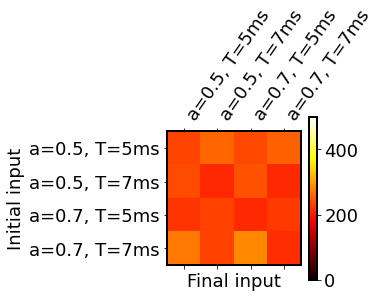

In [21]:
file_regex = './sims_out/2_moment_control_param_sweep_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.2_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.3_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-07-21_23:42:19.914916
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.3_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.007_2024-07-21_23:46:50.453643
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.3_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.005_2024-07-21_23:51:19.249016
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.3_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.007_2024-07-21_23:54:59.306045
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.3_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2

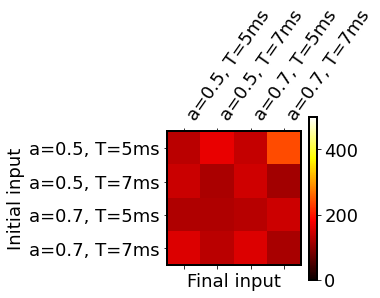

In [22]:
file_regex = './sims_out/2_moment_control_param_sweep_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.3_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-07-21_23:24:20.596502
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.007_2024-07-21_23:28:38.634503
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.005_2024-07-21_23:33:10.114652
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.007_2024-07-21_23:37:33.617452
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2

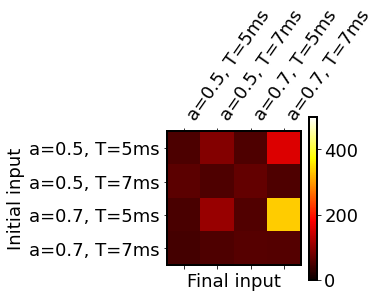

In [23]:
file_regex = './sims_out/2_moment_control_param_sweep_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-07-22_12:52:54.613599
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-07-22_12:52:54.613599
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.007_2024-07-22_12:56:46.285347
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.007_2024-07-22_12:56:46.285347
0__SEED_1_SYN_CHANGE_PROB_0_EXC_RULE

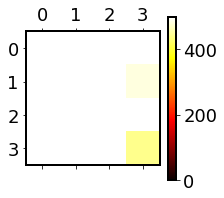

In [10]:
file_regex = './sims_out/2_moment_control_param_sweep_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(file_regex, (4, 4))

In [51]:
def find_batch_num(name):
    idx = name.find('batch')
    trimmed_name = name[idx + 6:]
    idx_underscore = trimmed_name.find('_')
    trimmed_name = trimmed_name[:idx_underscore]
    return int(trimmed_name)

def find_trial_num(name):
    idx = name.find('trial')
    trimmed_name = name[idx + 6:]
    idx_underscore = trimmed_name.find('.')
    trimmed_name = trimmed_name[:idx_underscore]
    return int(trimmed_name)

def plot_activities(dir_names):
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 7 * scale), sharex=True, sharey=True)
    
    for dir_name in dir_names:
        file_regex = os.path.join(dir_name, 'all_r_0_batch_0_trial_*')
        
        initial_activations = []
        final_activations = []
        
        for file_path in glob.glob(file_regex):
            
            batch_num = find_batch_num(file_path)
            trial_num = find_trial_num(file_path)
            
            r = read_csv(file_path, read_header=False)
            
            if trial_num < 10:
                initial_activations.append(r)
            else:
                final_activations.append(r)
                
        mean_initial = np.array(initial_activations)
        mean_initial = mean_initial.mean(axis=0)
        
        mean_final = np.array(final_activations)
        mean_final = mean_final.mean(axis=0)
        
        n_lines = mean_initial.shape[1]
        cmap = matplotlib.colormaps['plasma']
        colors = cmap(np.linspace(0, 1, n_lines))
                
        for n_idx in reversed(np.arange(15)):
            axs.plot(np.arange(mean_initial.shape[0]), 0.2 * n_idx + mean_initial[:, n_idx], c=colors[n_idx])
            axs.plot(np.arange(mean_final.shape[0]), 0.2 * n_idx + mean_final[:, n_idx], '--', c=colors[n_idx])
            
        axs.set_xlim(0, 1000)
            
            

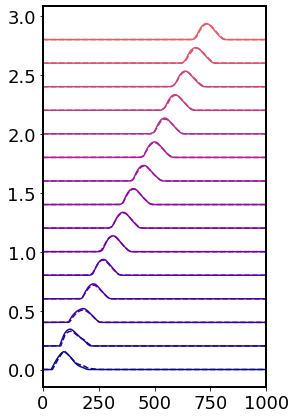

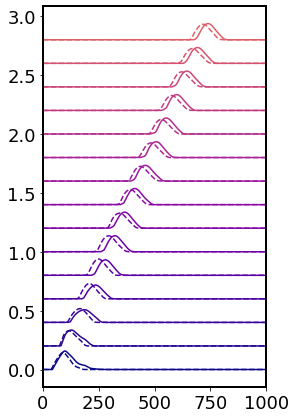

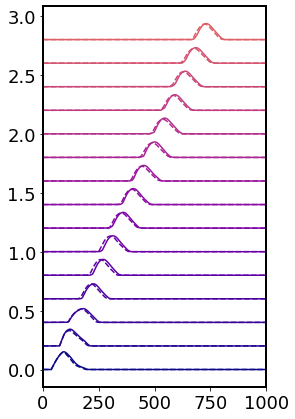

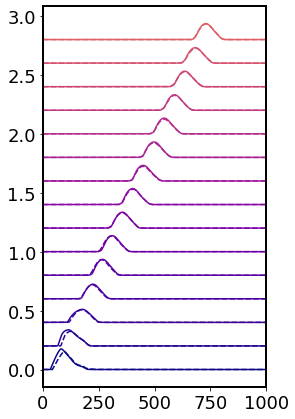

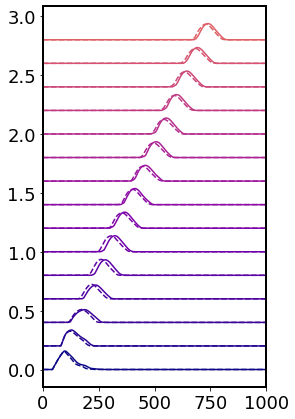

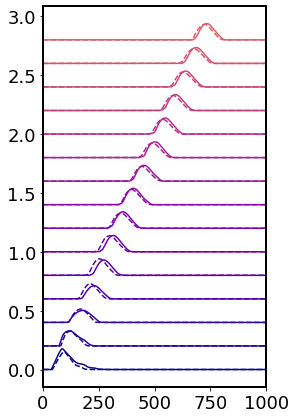

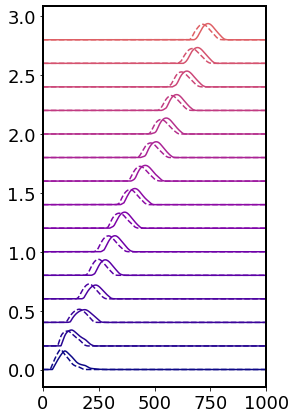

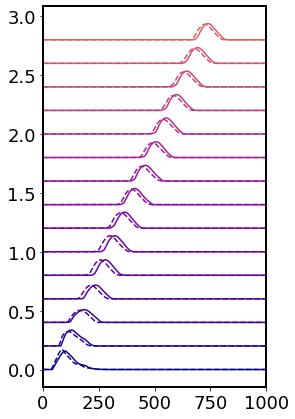

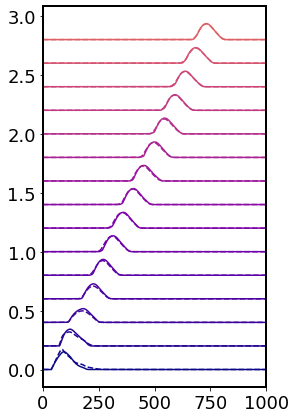

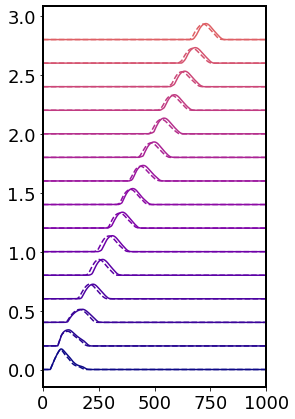

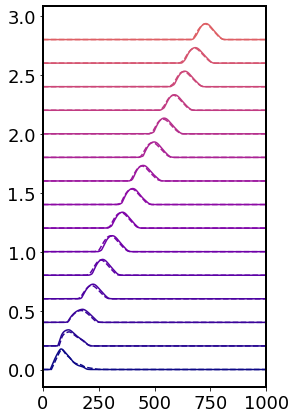

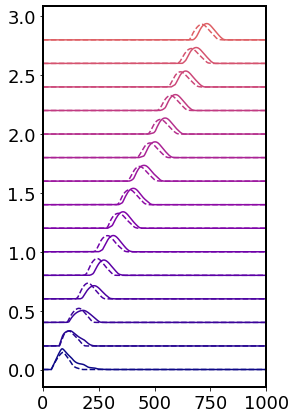

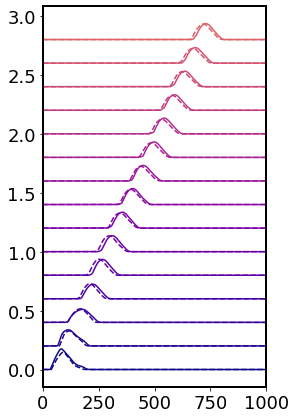

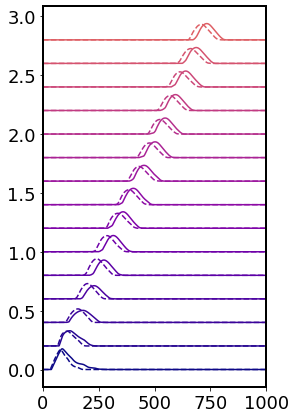

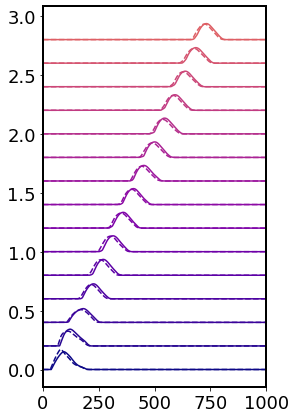

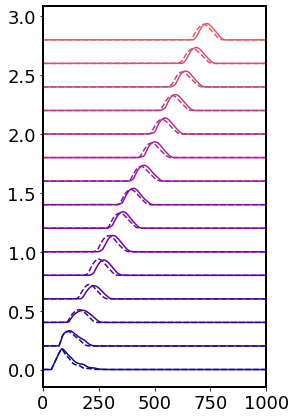

In [52]:
for dir_name in glob.glob('./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'):
    plot_activities([
        dir_name
    ])